---
title: Time Series Example
tags: [jupyter]
keywords: pandas
summary: "Pandas manipulating time series."
mlType: dataFrame
infoType: pandas
sidebar: pandas_sidebar
permalink: __AutoGenThis__
notebookfilename:  __AutoGenThis__
---

This is an overview of various [time series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html) manipulations you can do in pandas.  It is from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html).

In [18]:
import sys

sys.path.append("../")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [20]:
from datetime import datetime
from dateutil import parser

# Padas Options

In [21]:
pd.set_option('max_rows', 20)

# I/O

In [22]:
dataURL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv'
data = pd.read_csv(dataURL, index_col='Date',parse_dates=True)

In [23]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [24]:
data.shape

(67128, 3)

In [25]:
data.columns = ['Total','East','West']
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [26]:
data.dropna().describe()

,Total,East,West
count,67118.000000,67118.000000,67118.000000
mean,112.912527,51.559835,61.352692
std,144.160880,66.522811,89.768937
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


# Visualizing the Data

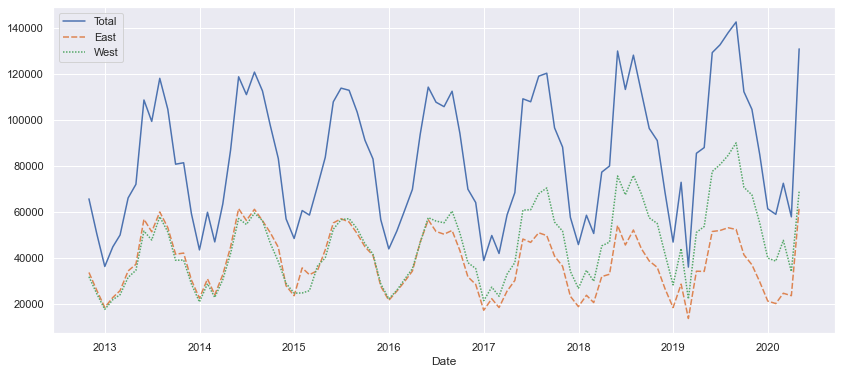

In [29]:
plt.figure(figsize=(14,6))

sns.set()

sns.lineplot(data=data.resample('M').sum())

plt.show()

There seems to be some seasonal peaks and valleys in there.

# Average Traffic as a Function of the time of Day

We want to group by time se lets do that first and then for each time we calculate the mean to identify the average time.  Then we plot this.

In [37]:
dataByTime  = data.groupby(data.index.time).mean()

In [39]:
dataByTime.head()

,Total,East,West
00:00:00,11.314980,4.804791,6.510189
01:00:00,5.997497,2.685735,3.311763
02:00:00,3.954138,1.899319,2.054819
03:00:00,2.907401,1.494816,1.412585
04:00:00,6.495173,3.446192,3.048981


Plotting sereies in pandas has some problems when plotting the dates but for some reason after running

```python
pd.plotting.register_matplotlib_converters()
```

then you are able to see it.  This resolution was found [here](https://github.com/facebook/prophet/issues/999) in the github prophet page.

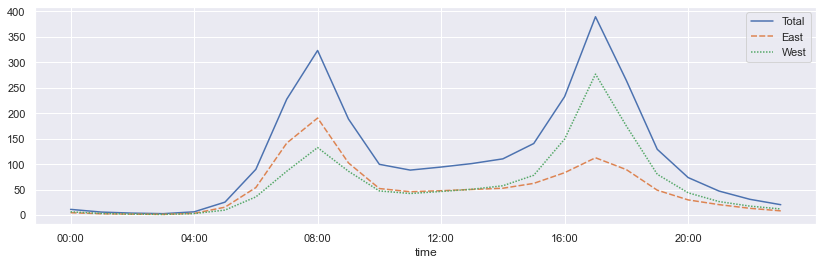

In [45]:
plt.figure(figsize=(14,4))
pd.plotting.register_matplotlib_converters()
sns.set()
sns.lineplot(data=dataByTime)

hourly_ticks = 4 * 60 * 60 * np.arange(6)
plt.xticks(hourly_ticks)

plt.show()

This makes complete sense as we would expect two peaks per day which coincide with the rush hours.  One in the morning before work and another during the evening after work.  Lets see what times.

In [49]:
dataByTime.index[np.argmax(dataByTime.Total)]

datetime.time(17, 0)

So based on the graph there is a peak at 8AM and then another one at 5PM

# What about a function by day

In [50]:
byWeek = data.groupby(data.index.dayofweek).mean()
byWeek.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

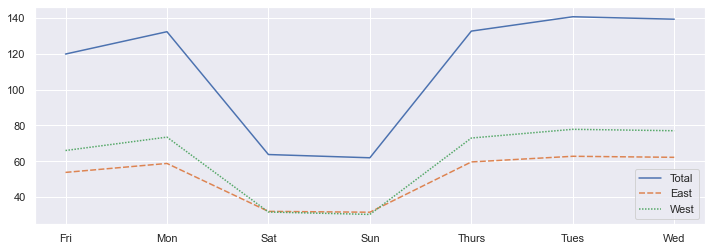

In [52]:
plt.figure(figsize=(12,4))
pd.plotting.register_matplotlib_converters()
sns.set()
sns.lineplot(data = byWeek)
plt.show()

Again this makes total sense as we would expect traffic during the workdays while weekends people are not out as often.

# Weekday vs Weekend Trends

First Identify the weekends and then Identify the by hourly.  We can use groupby to do then and plot the means.

In [56]:
data['weekday'] = data.index.dayofweek < 5

In [58]:
byTrend = data.groupby(['weekday',data.index.time]).mean()

In [59]:
byTrend.head()

Total      East      West
weekday                                        
False   00:00:00  15.934837  6.655388  9.279449
        01:00:00   9.266917  4.127820  5.139098
        02:00:00   6.023990  2.792929  3.231061
        03:00:00   3.452381  1.729323  1.723058
        04:00:00   3.858396  1.583960  2.274436

Now we want to plot them side by side to show the differences.

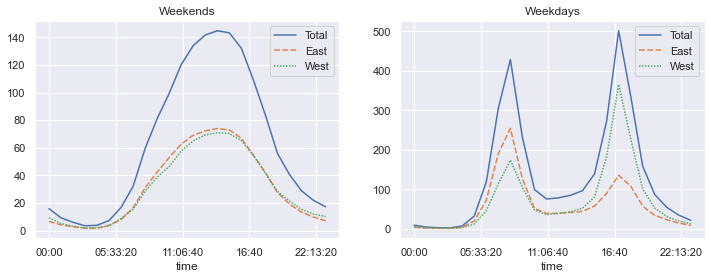

In [73]:
plt.figure(figsize=(12,4))

pd.plotting.register_matplotlib_converters()
ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
sns.lineplot(data=byTrend.loc[(False)])
ax1.set_title('Weekends')

ax2 = plt.subplot2grid((1,2),(0,1),colspan=1,rowspan=1)
sns.lineplot(data=byTrend.loc[(True)])
ax2.set_title('Weekdays')

plt.show()


